In [9]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# Population model

\begin{align}
    \dot P(t) = (B - D) P(t), \qquad P(0) = P_0
\end{align}

The analytic solution is given by
\begin{align}
    P(t) =  P_0 \ e^{\ (B-D)t}
\end{align}

In [10]:
def test_dynamics_solve(birth_rate, death_rate, P0 = 100,stepSize = 0.001, total_time = 100):
    def population_model(t, P, B = birth_rate, D = death_rate):
        return (B-D)*P
    B = birth_rate
    D = death_rate
    t0 = 0
    num_points = int(total_time / stepSize)



    T_Euler, S_Euler = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'Euler')
    T_RK2, S_RK2 = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'RK2')
    T_RK4, S_RK4 = dynamics_solve(population_model, D = 1, t_0 = t0, s_0=P0, h = stepSize, N = num_points, method = 'RK4')
    S_ana = P0*np.exp( (B-D) * T_Euler)

    plt.figure(figsize=(12,8))
    plt.plot(T_Euler, S_Euler, label = 'Euler')
    plt.plot(T_RK2, S_RK2, label = 'RK2')
    plt.plot(T_RK4, S_RK4, label = 'RK4')
    plt.plot(T_Euler, S_ana, 'k--',label = 'Analytic')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population model using Euler, RK2, and RK4')
    plt.show()

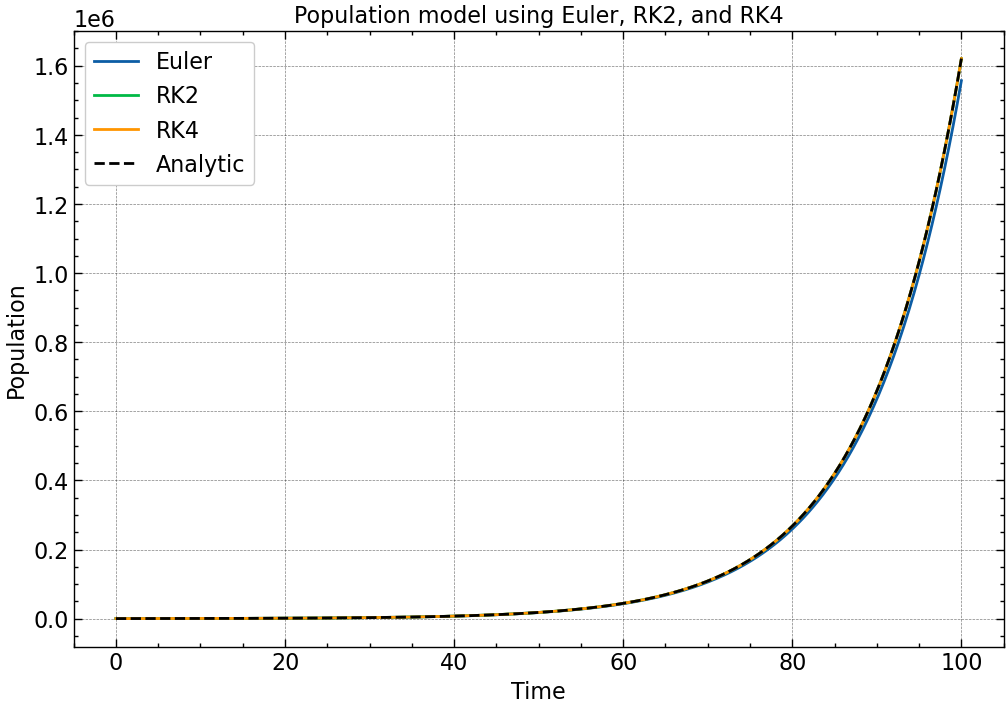

In [11]:
test_dynamics_solve(birth_rate=0.1, death_rate=0.01, P0=200 ,stepSize=0.1, total_time=100)

# Simple Harmonic
$$
H = \frac{1}{2} k q^{2} + \frac{p^2}{2m}
$$
$$
\dot{q} = \frac{\partial H}{\partial p} = \frac{p}{m}
$$
$$
\dot{p} = -\frac{\partial H}{\partial q} = -kq
$$

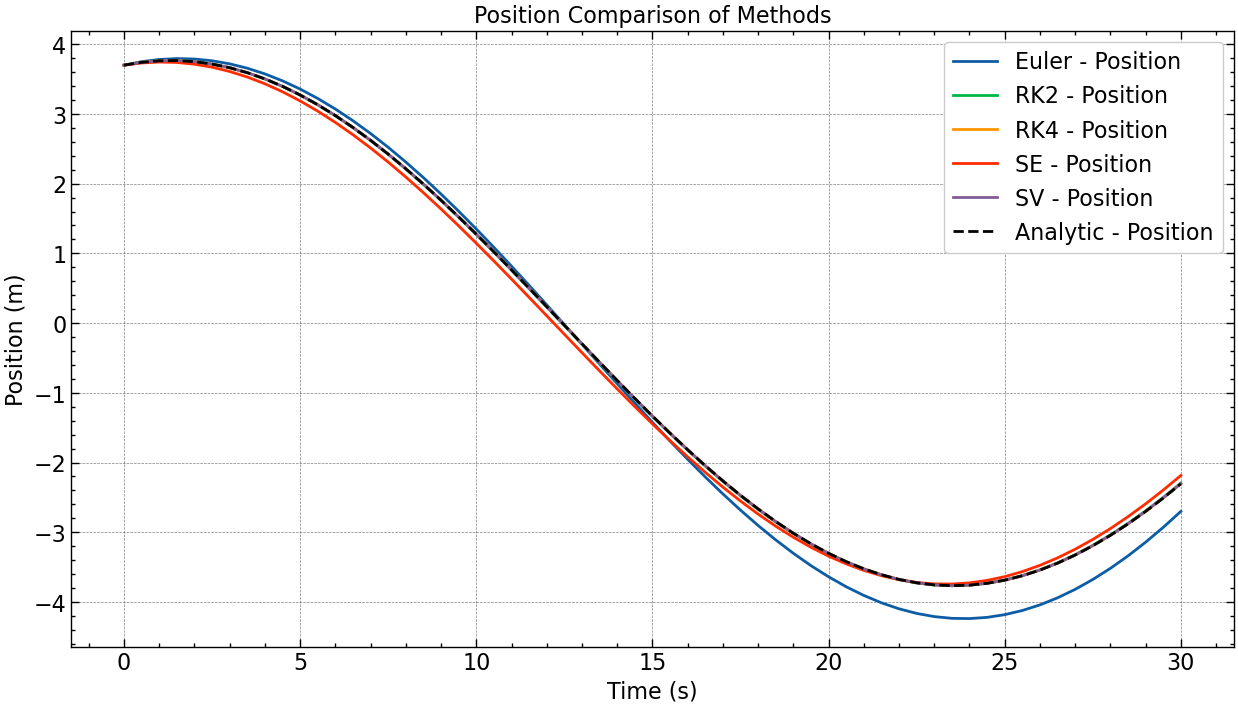

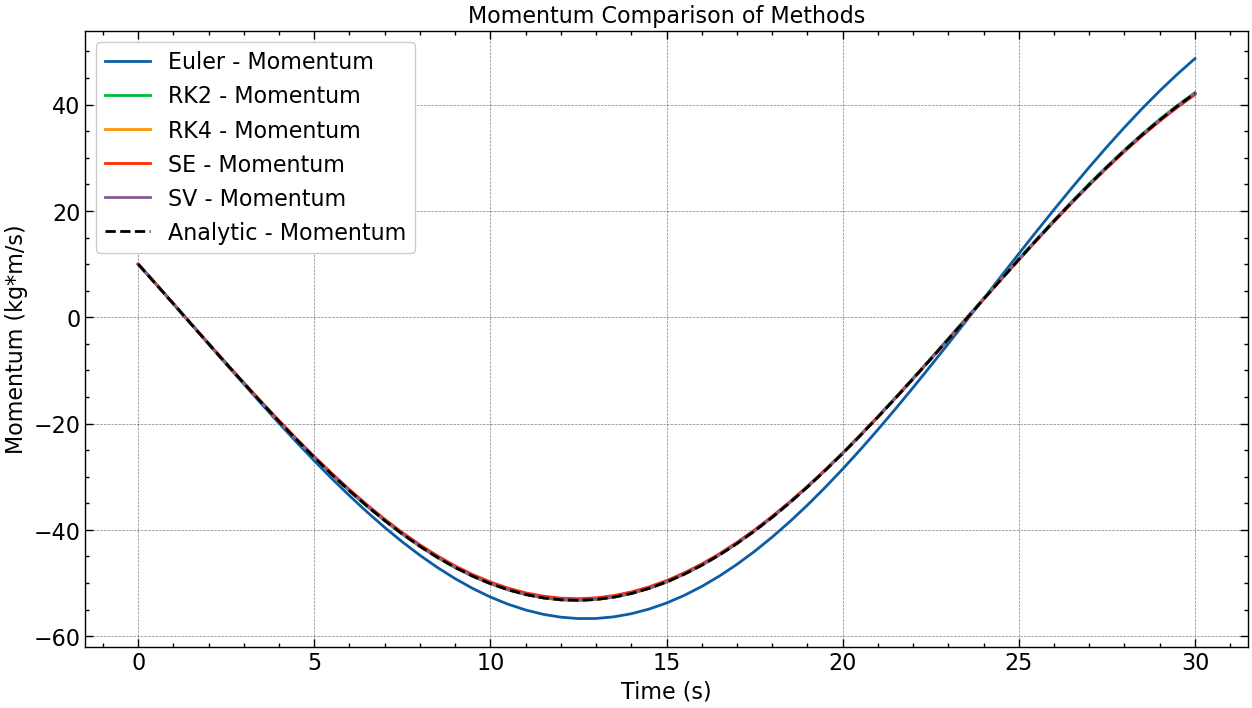

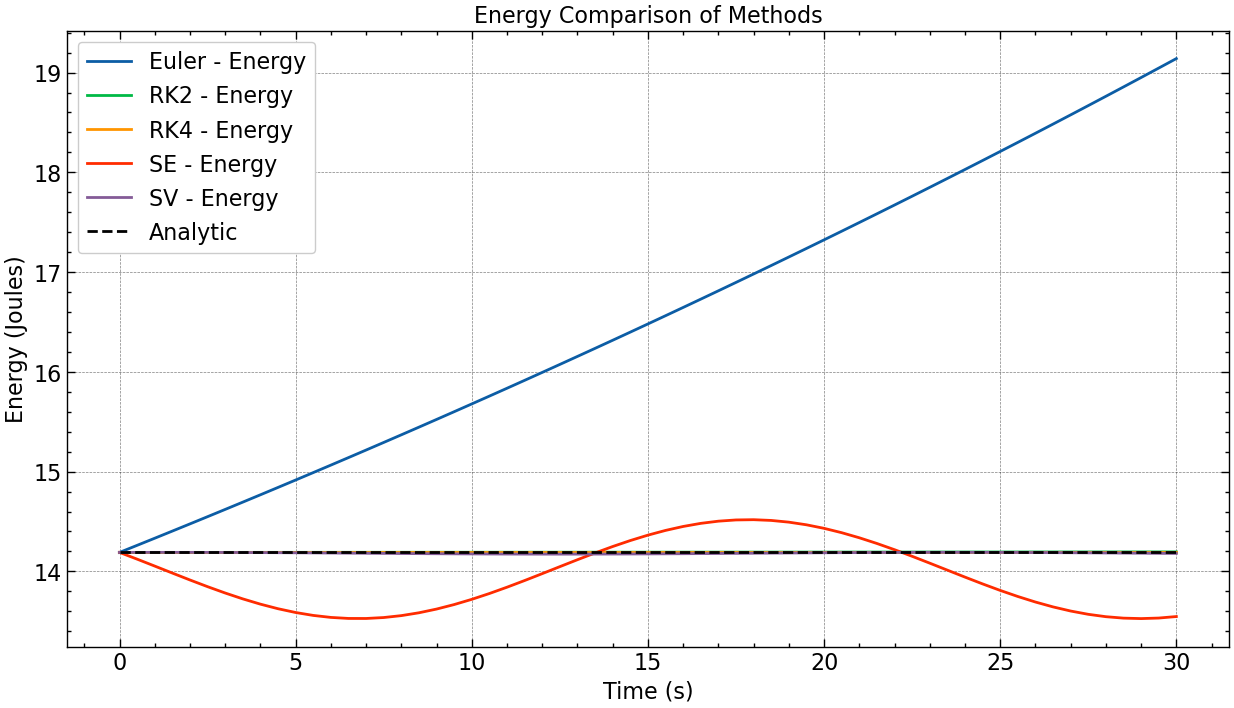

In [12]:
import math

def DynamicTest(spring=1, mass=1, Q0=1, P0=0, stepSize=0.1, total_time=10):
    k = spring
    m = mass

    def dH_dq(q, p):
        return k * q

    def dH_dp(q, p):
        return p / m

    def Hamiltonian(q, p):
        return 0.5 * k * q**2 + 0.5 * (p**2) / m

    def calculate_energy(q, p, m, k):
        A = np.sqrt((p**2) / (k * m) + q**2)
        return 0.5*k*A**2
    
    def calculate_A_and_phi(x0, p0, m, k):
        omega = math.sqrt(k / m)
        A = math.sqrt((p0**2) / (k * m) + x0**2)
        phi = math.atan2(-p0 / (m * omega * A), x0 / A)
        return A, phi

    # Initial conditions
    q_0 = Q0
    p_0 = P0
    h = stepSize
    num_points = int(total_time / stepSize)
    methods = ["Euler", "RK2", "RK4", "SE", "SV"]

    T_analytic = 0

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        T_analytic = T
        plt.plot(T, Q, label=f"{method} - Position")
    A, phi = calculate_A_and_phi(Q0, P0, m, k)
    omega = np.sqrt(k/m)
    Q_analytic = A*np.cos(omega*T_analytic + phi)
    P_analytic = -m*A*omega*np.sin(omega*T_analytic+phi)
    plt.plot(T_analytic, Q_analytic,'k--' ,label = 'Analytic - Position')
    plt.title('Position Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        plt.plot(T, P, label=f"{method} - Momentum")
    plt.plot(T_analytic, P_analytic, 'k--' ,label = 'Analytic - Momentum')
    plt.title('Momentum Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Momentum (kg*m/s)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15, 8))
    for method in methods:
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, q_0=q_0, p_0=p_0, h=h, N=num_points, method=method)
        E = Hamiltonian(Q, P)
        plt.plot(T, E, label=f"{method} - Energy")
    plt.plot(T, [calculate_energy(Q0, P0, m , k)] * (T.size), 'k--',label = 'Analytic')
    plt.title('Energy Comparison of Methods')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (Joules)')
    plt.legend()
    plt.show()

# Example usage
DynamicTest(spring=2, mass=100, Q0=3.7, P0=10, stepSize=0.5, total_time=30)
